In [168]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [169]:
df = pd.read_csv('Airline_data.csv')
df

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,3863.0
1,1977,25,516,4300.0
2,1978,31,754,5027.0
3,1979,31,877,5481.0
4,1980,22,814,5814.0
5,1981,21,362,6033.0
6,1982,26,764,5877.0
7,1983,20,809,6223.0
8,1984,16,223,7433.0
9,1985,22,1066,7107.0


In [170]:
df.describe()

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
count,10.00000,10.000000,10.000000,10.000000
mean,1980.50000,23.800000,691.900000,5715.800000
std,3.02765,4.709329,252.389228,1117.767795
min,1976.00000,16.000000,223.000000,3863.000000
25%,1978.25000,21.250000,570.500000,5140.500000
50%,1980.50000,23.000000,759.000000,5845.500000
75%,1982.75000,25.750000,812.750000,6175.500000
max,1985.00000,31.000000,1066.000000,7433.000000


In [171]:
model_ppc=CmdStanModel(stan_file='accidents.stan')  

sim=model_ppc.sample(data={'N': 10, 'ni': df['Miles flown [100 mln miles]']})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [172]:
df_sim = sim.draws_pd()

In [173]:
sim.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00000,NaN,0.000000,0.0000,0.0000,0.00000,NaN,NaN,NaN
alfa,2.10000,4.800000e-03,0.300000,2.1000,2.1000,2.10000,4000.0,79000.0,1.0
theta,0.00019,9.000000e-07,0.000055,0.0001,0.0002,0.00027,3800.0,74000.0,1.0
y[1],17.00000,9.500000e-02,5.900000,8.0000,17.0000,27.00000,3843.0,75358.0,1.0
y[2],19.00000,1.000000e-01,6.400000,9.0000,19.0000,30.00000,3791.0,74333.0,1.0
y[3],22.00000,1.300000e-01,8.000000,10.0000,22.0000,35.00000,3622.0,71027.0,1.0
y[4],24.00000,1.400000e-01,8.900000,11.0000,24.0000,40.00000,3960.0,77646.0,1.0
y[5],26.00000,1.600000e-01,9.600000,12.0000,25.0000,42.00000,3748.0,73492.0,1.0
y[6],27.00000,1.700000e-01,10.000000,13.0000,26.0000,45.00000,3819.0,74889.0,1.0


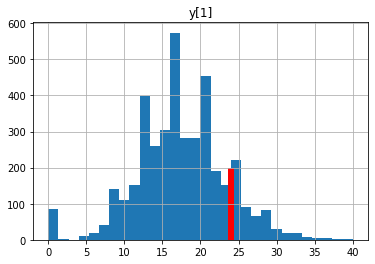

In [174]:
df_sim.hist(column='y[1]', bins=30)
plt.bar(df['Fatal accidents'][0], 200, color = 'r')
plt.show()

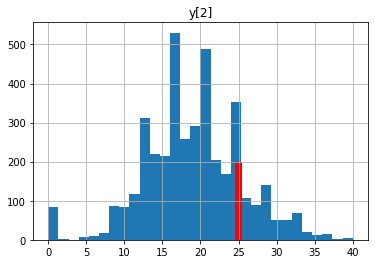

In [175]:
df_sim.hist(column='y[2]', bins=30)
plt.bar(df['Fatal accidents'][1], 200, color = 'r')
plt.show()

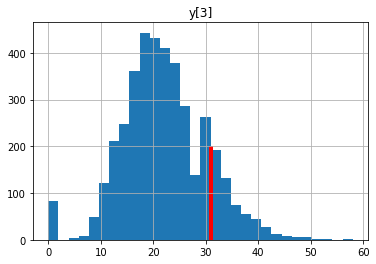

In [176]:
df_sim.hist(column='y[3]', bins=30)
plt.bar(df['Fatal accidents'][2], 200, color = 'r')
plt.show()

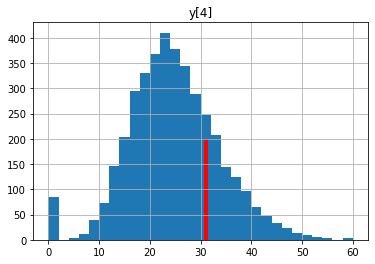

In [177]:
df_sim.hist(column='y[4]', bins=30)
plt.bar(df['Fatal accidents'][3], 200, color = 'r')
plt.show()

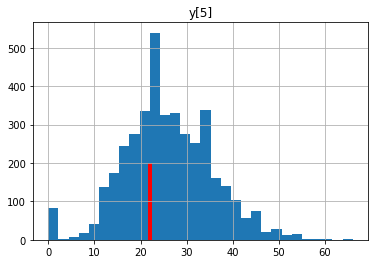

In [178]:
df_sim.hist(column='y[5]', bins=30)
plt.bar(df['Fatal accidents'][4], 200, color = 'r')
plt.show()

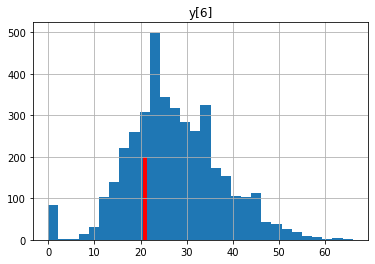

In [179]:
df_sim.hist(column='y[6]', bins=30)
plt.bar(df['Fatal accidents'][5], 200, color = 'r')
plt.show()

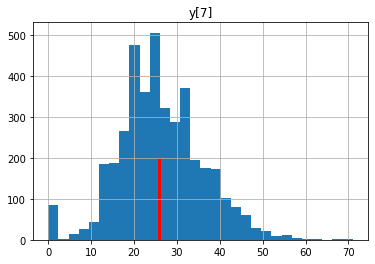

In [180]:
df_sim.hist(column='y[7]', bins=30)
plt.bar(df['Fatal accidents'][6], 200, color = 'r')
plt.show()

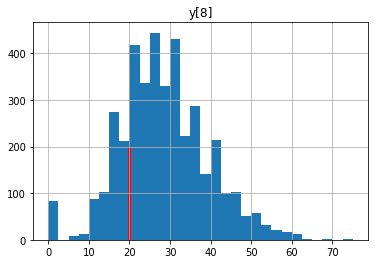

In [181]:
df_sim.hist(column='y[8]', bins=30)
plt.bar(df['Fatal accidents'][7], 200, color = 'r')
plt.show()

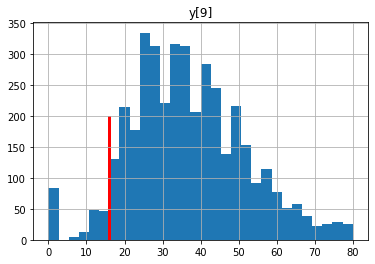

In [182]:
df_sim.hist(column='y[9]', bins=30)
plt.bar(df['Fatal accidents'][8], 200, color = 'r')
plt.show()

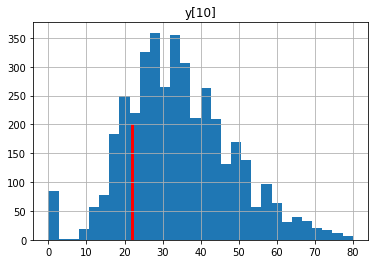

In [183]:
df_sim.hist(column='y[10]', bins=30)
plt.bar(df['Fatal accidents'][9], 200, color = 'r')
plt.show()

In [184]:
model_fit=CmdStanModel(stan_file='model.stan')  # zmienić parametry w stanie, uważać żeby theta nie była za duża

sim_fit=model_fit.sample(data={'N': 10, 'ni': df['Miles flown [100 mln miles]'], 'accidents': df['Fatal accidents']})

INFO:cmdstanpy:compiling stan file /home/lab5/model.stan to exe file /home/lab5/model
INFO:cmdstanpy:compiled model executable: /home/lab5/model
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [185]:
sim_fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-3.600000e+91,4.700000e+91,9.600000e+91,-2.500000e+92,510.00000,5.100000e+02,4.1,5.4,2.0
alfa,1.400000e+00,7.900000e-01,1.100000e+00,-5.400000e-01,2.10000,2.100000e+00,2.0,2.7,19.0
theta,7.300000e-03,8.700000e-03,1.200000e-02,1.600000e-04,0.00019,2.900000e-02,2.0,2.6,320.0
lambda[1],1.353271e+47,1.705209e+47,2.762709e+47,1.300000e+01,16.00000,8.026620e+47,2.6,3.5,3.2
lambda[2],3.674767e+52,4.652247e+52,7.741454e+52,1.500000e+01,18.00000,2.239770e+53,2.8,3.6,3.0
lambda[3],4.056464e+61,5.173337e+61,9.015326e+61,1.700000e+01,20.00000,2.568660e+62,3.0,4.0,2.6
lambda[4],1.807914e+67,2.315430e+67,4.155150e+67,1.900000e+01,22.00000,1.167410e+68,3.2,4.2,2.4
lambda[5],2.520592e+71,3.237532e+71,5.936476e+71,2.000000e+01,23.00000,1.647780e+72,3.4,4.4,2.3
lambda[6],1.341032e+74,1.725593e+74,3.209145e+74,2.100000e+01,24.00000,8.830090e+74,3.5,4.6,2.3


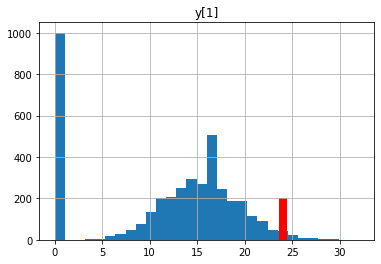

In [186]:
df_sim = sim_fit.draws_pd()
df_sim.hist(column='y[1]', bins=30)
plt.bar(df['Fatal accidents'][0], 200, color = 'r')
plt.show()

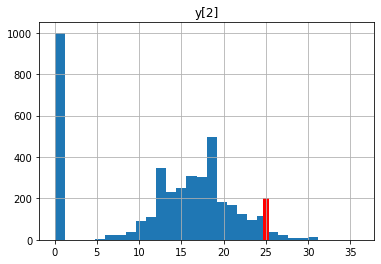

In [187]:
df_sim.hist(column='y[2]', bins=30)
plt.bar(df['Fatal accidents'][1], 200, color = 'r')
plt.show()

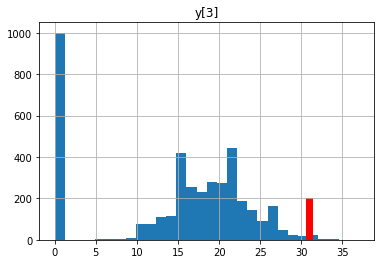

In [188]:
df_sim.hist(column='y[3]', bins=30)
plt.bar(df['Fatal accidents'][2], 200, color = 'r')
plt.show()

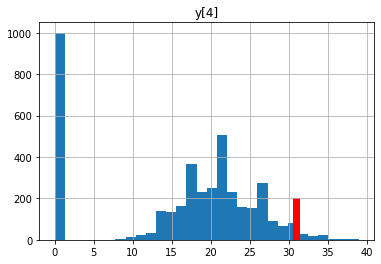

In [189]:
df_sim.hist(column='y[4]', bins=30)
plt.bar(df['Fatal accidents'][3], 200, color = 'r')
plt.show()

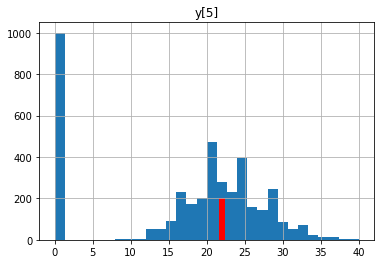

In [190]:
df_sim.hist(column='y[5]', bins=30)
plt.bar(df['Fatal accidents'][4], 200, color = 'r')
plt.show()

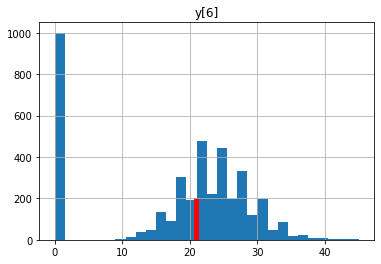

In [191]:
df_sim.hist(column='y[6]', bins=30)
plt.bar(df['Fatal accidents'][5], 200, color = 'r')
plt.show()

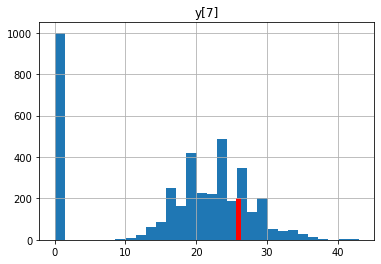

In [192]:
df_sim.hist(column='y[7]', bins=30)
plt.bar(df['Fatal accidents'][6], 200, color = 'r')
plt.show()

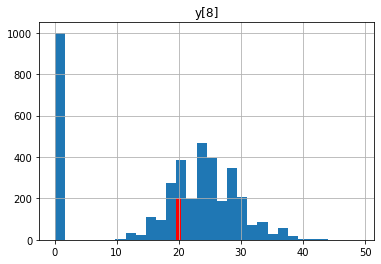

In [193]:
df_sim.hist(column='y[8]', bins=30)
plt.bar(df['Fatal accidents'][7], 200, color = 'r')
plt.show()

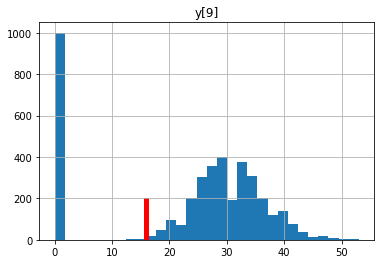

In [194]:
df_sim.hist(column='y[9]', bins=30)
plt.bar(df['Fatal accidents'][8], 200, color = 'r')
plt.show()

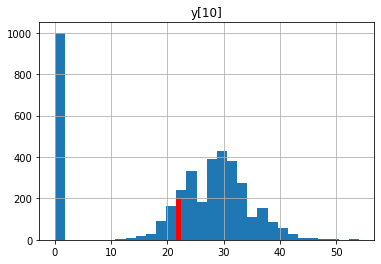

In [195]:
df_sim.hist(column='y[10]', bins=30)
plt.bar(df['Fatal accidents'][9], 200, color = 'r')
plt.show()

In [196]:
model2_ppc=CmdStanModel(stan_file='alfa_array.stan') 

sim2=model2_ppc.sample(data={'N': 10, 'ni': df['Miles flown [100 mln miles]']})

INFO:cmdstanpy:compiling stan file /home/lab5/alfa_array.stan to exe file /home/lab5/alfa_array
INFO:cmdstanpy:compiled model executable: /home/lab5/alfa_array
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed                      

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [197]:
sim2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.00000,NaN,0.000000,0.00000,0.0000,0.00000,NaN,NaN,NaN
theta,0.00019,8.600000e-07,0.000053,0.00011,0.0002,0.00027,3900.0,36000.0,1.0
alfa[1],2.10000,4.900000e-03,0.290000,2.10000,2.1000,2.10000,3475.0,32174.0,1.0
alfa[2],2.10000,4.900000e-03,0.290000,2.10000,2.1000,2.10000,3477.0,32191.0,1.0
alfa[3],2.10000,4.900000e-03,0.290000,2.10000,2.1000,2.10000,3507.0,32476.0,1.0
alfa[4],2.10000,4.900000e-03,0.290000,2.10000,2.1000,2.10000,3496.0,32372.0,1.0
alfa[5],2.10000,4.900000e-03,0.290000,2.10000,2.1000,2.10000,3476.0,32189.0,1.0
alfa[6],2.10000,4.900000e-03,0.290000,2.10000,2.1000,2.10000,3493.0,32347.0,1.0
alfa[7],2.10000,4.900000e-03,0.290000,2.10000,2.1000,2.10000,3510.0,32503.0,1.0


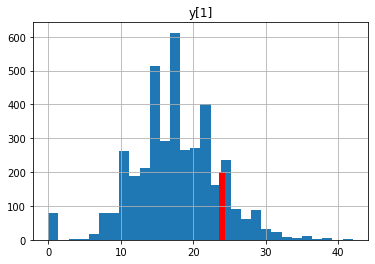

In [198]:
df_sim = sim2.draws_pd()
df_sim.hist(column='y[1]', bins=30)
plt.bar(df['Fatal accidents'][0], 200, color = 'r')
plt.show()

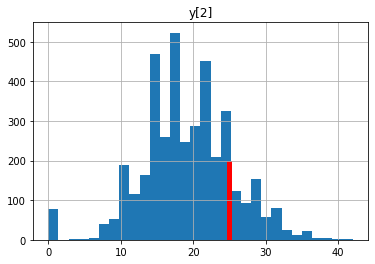

In [199]:
df_sim.hist(column='y[2]', bins=30)
plt.bar(df['Fatal accidents'][1], 200, color = 'r')
plt.show()

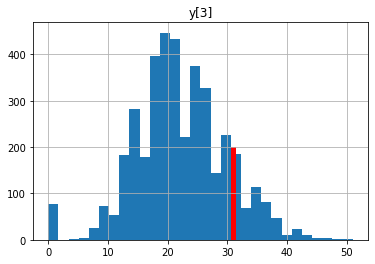

In [200]:
df_sim.hist(column='y[3]', bins=30)
plt.bar(df['Fatal accidents'][2], 200, color = 'r')
plt.show()

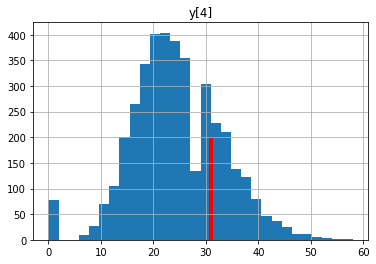

In [201]:
df_sim.hist(column='y[4]', bins=30)
plt.bar(df['Fatal accidents'][3], 200, color = 'r')
plt.show()

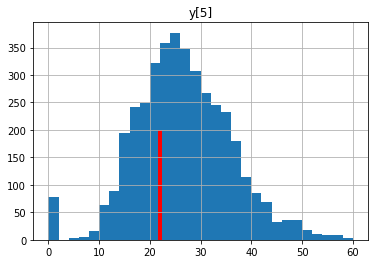

In [202]:
df_sim.hist(column='y[5]', bins=30)
plt.bar(df['Fatal accidents'][4], 200, color = 'r')
plt.show()

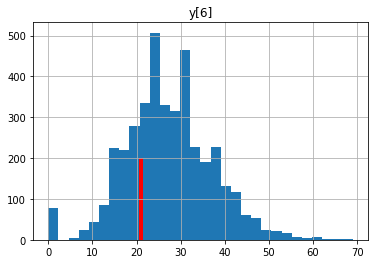

In [203]:
df_sim.hist(column='y[6]', bins=30)
plt.bar(df['Fatal accidents'][5], 200, color = 'r')
plt.show()

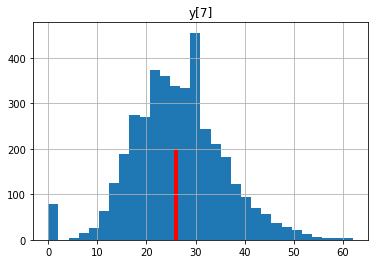

In [204]:
df_sim.hist(column='y[7]', bins=30)
plt.bar(df['Fatal accidents'][6], 200, color = 'r')
plt.show()

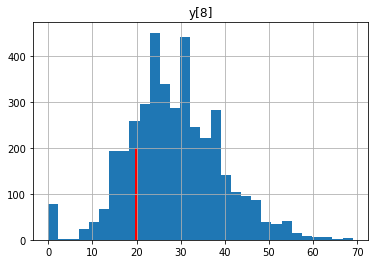

In [205]:
df_sim.hist(column='y[8]', bins=30)
plt.bar(df['Fatal accidents'][7], 200, color = 'r')
plt.show()

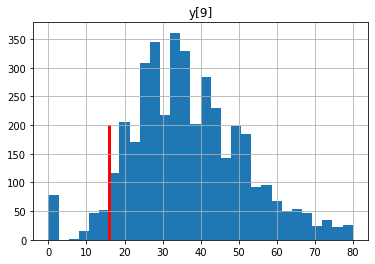

In [206]:
df_sim.hist(column='y[9]', bins=30)
plt.bar(df['Fatal accidents'][8], 200, color = 'r')
plt.show()

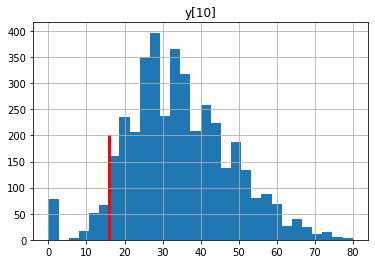

In [207]:
df_sim.hist(column='y[10]', bins=30)
plt.bar(df['Fatal accidents'][8], 200, color = 'r')
plt.show()

In [209]:
model2_fit=CmdStanModel(stan_file='alfa_array_model.stan')  

sim2_fit=model2_fit.sample(data={'N': 10, 'ni': df['Miles flown [100 mln miles]'], 'accidents': df['Fatal accidents']})

INFO:cmdstanpy:compiling stan file /home/lab5/alfa_array_model.stan to exe file /home/lab5/alfa_array_model
INFO:cmdstanpy:compiled model executable: /home/lab5/alfa_array_model
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)
























chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [210]:
sim2_fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-6.200000e+60,7.800000e+60,1.500000e+61,-4.400000e+61,490.0,5.000000e+02,3.6,1.10,4.1
alfa[1],6.300000e-01,1.100000e+00,1.500000e+00,-1.300000e+00,2.1,2.100000e+00,2.0,0.58,230.0
alfa[2],1.200000e+00,8.900000e-01,1.300000e+00,-9.500000e-01,2.1,2.100000e+00,2.0,0.58,190.0
alfa[3],9.900000e-01,8.800000e-01,1.300000e+00,-9.300000e-01,2.1,2.100000e+00,2.0,0.58,194.0
alfa[4],1.000000e+00,1.100000e+00,1.600000e+00,-1.600000e+00,2.1,2.100000e+00,2.0,0.58,245.0
alfa[5],7.400000e-01,1.100000e+00,1.500000e+00,-1.500000e+00,2.1,2.100000e+00,2.0,0.58,232.0
alfa[6],8.900000e-01,8.600000e-01,1.200000e+00,-5.200000e-01,2.1,2.100000e+00,2.0,0.58,184.0
alfa[7],1.600000e+00,3.900000e-01,5.600000e-01,8.100000e-01,2.1,2.100000e+00,2.0,0.58,86.0
alfa[8],1.400000e-01,1.400000e+00,2.000000e+00,-1.900000e+00,2.1,2.100000e+00,2.0,0.58,303.0


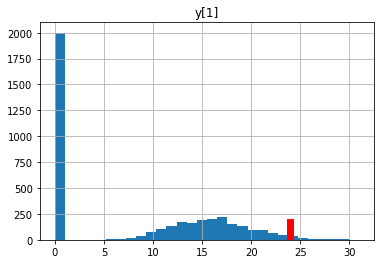

In [211]:
df_sim = sim2_fit.draws_pd()
df_sim.hist(column='y[1]', bins=30)
plt.bar(df['Fatal accidents'][0], 200, color = 'r')
plt.show()

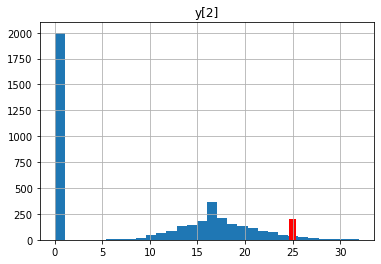

In [212]:
df_sim.hist(column='y[2]', bins=30)
plt.bar(df['Fatal accidents'][1], 200, color = 'r')
plt.show()

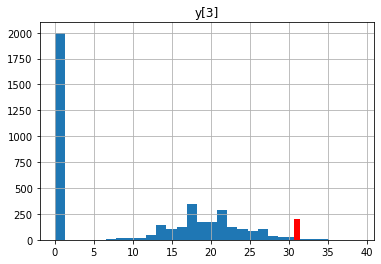

In [213]:
df_sim.hist(column='y[3]', bins=30)
plt.bar(df['Fatal accidents'][2], 200, color = 'r')
plt.show()

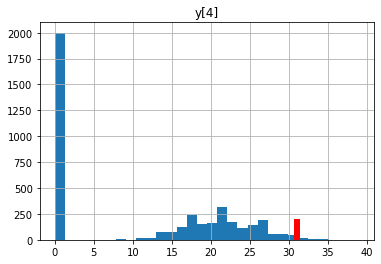

In [214]:
df_sim.hist(column='y[4]', bins=30)
plt.bar(df['Fatal accidents'][3], 200, color = 'r')
plt.show()

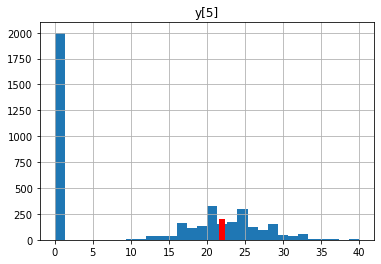

In [215]:
df_sim.hist(column='y[5]', bins=30)
plt.bar(df['Fatal accidents'][4], 200, color = 'r')
plt.show()

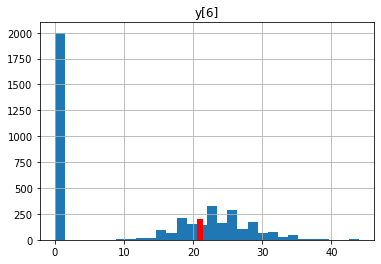

In [216]:
df_sim.hist(column='y[6]', bins=30)
plt.bar(df['Fatal accidents'][5], 200, color = 'r')
plt.show()

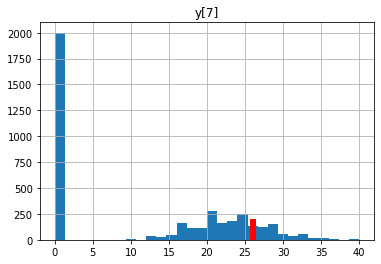

In [217]:
df_sim.hist(column='y[7]', bins=30)
plt.bar(df['Fatal accidents'][6], 200, color = 'r')
plt.show()

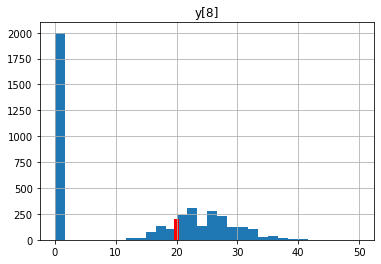

In [218]:
df_sim.hist(column='y[8]', bins=30)
plt.bar(df['Fatal accidents'][7], 200, color = 'r')
plt.show()

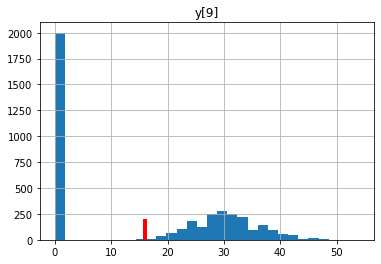

In [219]:
df_sim.hist(column='y[9]', bins=30)
plt.bar(df['Fatal accidents'][8], 200, color = 'r')
plt.show()

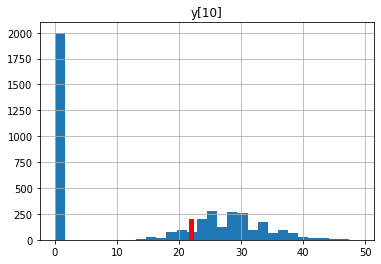

In [220]:
df_sim.hist(column='y[10]', bins=30)
plt.bar(df['Fatal accidents'][9], 200, color = 'r')
plt.show()